In [7]:
import pandas as pd
import numpy as np

In [8]:
df=pd.read_csv('diabetes.csv')
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [9]:
df.shape

(768, 9)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [11]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [12]:
#Checking for null values
df.isna().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

#### Extract  input and target features

In [13]:
x=df.iloc[:,:-1]
x.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33


In [14]:
y=df.iloc[:,-1]
y.head()

0    1
1    0
2    1
3    0
4    1
Name: Outcome, dtype: int64

#### Train-Test splitting

In [40]:
from sklearn.model_selection import train_test_split

In [16]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3)

In [17]:
x_train.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
765,5,121,72,23,112,26.2,0.245,30
350,4,92,80,0,0,42.2,0.237,29
208,1,96,64,27,87,33.2,0.289,21
638,7,97,76,32,91,40.9,0.871,32
621,2,92,76,20,0,24.2,1.698,28


In [18]:
y_train.head()

765    0
350    0
208    0
638    1
621    0
Name: Outcome, dtype: int64

#### Normalization of input values

In [19]:
from sklearn.preprocessing import StandardScaler

In [20]:
scaler=StandardScaler()
scaler.fit(x_train)
x_train=scaler.transform(x_train)
x_test=scaler.transform(x_test)

In [21]:
x_train

array([[ 0.32087331, -0.02224577,  0.13503557, ..., -0.72173529,
        -0.65749046, -0.30195314],
       [ 0.02632807, -0.93151964,  0.55540717, ...,  1.35049517,
        -0.6808989 , -0.38609887],
       [-0.85730766, -0.80610255, -0.28533603, ...,  0.18486553,
        -0.52874406, -1.05926476],
       ...,
       [-0.85730766, -0.68068547,  0.13503557, ..., -0.83829826,
         0.55097009, -0.47024461],
       [-1.1518529 ,  1.26327936,  0.34522137, ...,  2.30890175,
        -0.30928997, -0.63853608],
       [-1.1518529 , -0.33578848, -0.23278958, ..., -0.92895834,
         0.5568222 , -0.2178074 ]])

In [22]:
x_test

array([[-0.56276241,  1.04379946, -0.91589343, ...,  0.89719475,
        -0.67212074, -0.72268182],
       [-0.56276241,  0.25994267,  1.39615038, ..., -1.18798715,
        -0.59019121, -1.05926476],
       [-0.26821717,  1.13786227, -0.28533603, ..., -0.07416328,
        -0.51118773, -0.80682755],
       ...,
       [ 0.02632807,  0.69890247,  0.66050007, ...,  0.87129187,
         0.24666041,  0.28706702],
       [ 0.90996379, -0.24172567, -0.28533603, ..., -0.56631801,
         0.76749813,  0.03462981],
       [ 0.61541855,  1.92171905,  1.29105747, ...,  1.169175  ,
         2.90059194,  0.96023291]])

### Model Creation-Naive-bayes

In [23]:
from sklearn.naive_bayes import GaussianNB

In [24]:
model=GaussianNB()
model.fit(x_train,y_train)

GaussianNB()

In [25]:
y_pred=model.predict(x_test)
y_pred

array([1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0,
       1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1], dtype=int64)

In [26]:
from sklearn.metrics import classification_report,accuracy_score,confusion_matrix,ConfusionMatrixDisplay

In [27]:
score=accuracy_score(y_test,y_pred)
score

0.7445887445887446

In [28]:
cm=confusion_matrix(y_test,y_pred)
cm

array([[123,  21],
       [ 38,  49]], dtype=int64)

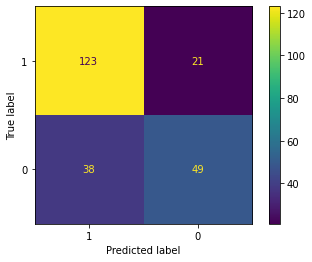

In [29]:
cmd=ConfusionMatrixDisplay(cm,display_labels=['1','0'])
cmd.plot()

In [30]:
nb_cr=classification_report(y_test,y_pred)
print(nb_cr)

              precision    recall  f1-score   support

           0       0.76      0.85      0.81       144
           1       0.70      0.56      0.62        87

    accuracy                           0.74       231
   macro avg       0.73      0.71      0.72       231
weighted avg       0.74      0.74      0.74       231



### Model Creation-KNN

In [31]:
from sklearn.neighbors import KNeighborsClassifier

In [33]:
knn_model=KNeighborsClassifier(n_neighbors=5)
knn_model.fit(x_train,y_train)

KNeighborsClassifier()

In [34]:
knn_model.predict(x_test)

array([1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1], dtype=int64)

In [36]:
score=accuracy_score(y_test,y_pred)
score

0.7445887445887446

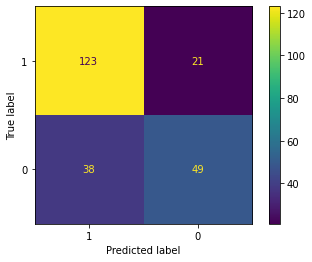

In [38]:
knn_cmd=ConfusionMatrixDisplay(confusion_matrix(y_test,y_pred),display_labels=[1,0])
knn_cmd.plot();

In [39]:
knn_cr=classification_report(y_test,y_pred)
print(knn_cr)

              precision    recall  f1-score   support

           0       0.76      0.85      0.81       144
           1       0.70      0.56      0.62        87

    accuracy                           0.74       231
   macro avg       0.73      0.71      0.72       231
weighted avg       0.74      0.74      0.74       231

